In [23]:
import numpy as np
import ipdb # for debugging
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse

In [24]:
def j1(x1, x2):
    s1 = np.sin(x1[2])
    c1 = np.cos(x1[2])

    return np.arrray([[1, 0, -x2[0] * s1 - x2[1] * c1], [0, 1, x2[0] * c1 - x2[1] * s1], [0, 0, 1]])

def j2(x1, x2):
    s1 = np.sin(x1[2])
    c1 = np.cos(x1[2])

    return np.array([[c1, -s1, 0], [s1, c1, 0], [0, 0, 1]])

def jab(tab):
    if len(tab) != 3:
        raise Exception('tab is not a transformation')
    s = np.sin(tab[2])
    c = np.cos(tab[2])
    return np.array([[c, -s, tab[1]], [s, c, -tab[0]], [0, 0, 1]])

In [25]:
def tinv(tab):
    tba = np.zeros(tab.shape)
    for t in range(0, tab.shape[0]):
        tab[t:t+3] = tinv1(tab[t:t+3])
    return tba

def tinv1(tab):
    s = np.sin(tab[2])[0]
    c = np.cos(tab[2])[0]
    tba = np.array([[-tab(0)*c - tab(1)*s]
          [[tab(0)*s - tab(1)*c]]
          [-tab (2)]])
    return tba

In [26]:
def angle_wrap(a):
    if a > np.pi:
        return a-2*np.pi
    elif a < -np.pi:
        return a + 2*np.pi
    else:
        return a


In [27]:
def tcomp(tab, tbc):
    if len(tab) != 3:
        raise Exception('tab is not a transformation')

    if len(tbc) != 3:
        raise Exception('tab is not a transformation')

    ang = tab[2] + tbc[2]

    ang = angle_wrap(ang)

    s = np.sin(tab[2])[0]
    c = np.cos(tab[2])[0]
    
    xy = tab[:2] + np.matmul(np.array([[c, -s], [s, c]]),tbc[:2])
    tac = np.array([xy[0], xy[1], ang])
    
    return tac

In [2]:
def plot_ellipse(mean, cov_matrix,color, axes, scale_factor=1):
    eH = np.array(None)
    cov_matrix = cov_matrix[:2,:2]
    mean = mean[0:2]
    if(~any(np.diag(cov_matrix)==0)):
        eig_values, eig_vectors = np.linalg.eig(cov_matrix)
        ellipse = Ellipse(xy=mean, width=eig_values[0]*scale_factor, height=eig_values[1]*scale_factor,
                         angle=np.rad2deg(np.arccos(eig_vectors[0,0])), color='black')
        axes.add_artist(ellipse)
        ellipse.set_clip_box(axes.bbox)
        ellipse.set_facecolor('None')
        ellipse.set_edgecolor(color)

In [3]:
def draw_robot(Xr, col):
    p = 0.02
    a = np.array([-2, 10, -2, 10])
    l1 = (a[1] - a[0]) * p
    l2 = (a[3] - a[2]) * p
    P = np.array([[-1, 1, 0, -1], [-1, -1, 3, -1]])
    theta = Xr[2] - np.pi/2
    c = np.cos(theta)[0]
    s = np.sin(theta)[0]
    rot_mat = np.array([[c, -s], [s, c]])
    P = np.matmul(rot_mat, P)
    P[0] = P[0] * l1 + Xr[0]
    P[1] = P[1] * l2 + Xr[1]
    plt.plot(P[0,:],P[1,:], col, linewidth=0.1);
    plt.plot(Xr[0], Xr[1], '+' + col);
    

In [4]:
def differential_model(x, u, dT): 
    y = np.zeros([3, 1])
    if(u[1]== 0):
        y[0,0] = x[0] + u[0]*dT*np.cos(x[2])[0]
        y[1,0] = x[1] + u[0]*dT*np.sin(x[2])[0]
        y[2,0] = x[2];
    else:
        R=u[0]/u[1]
        y[0,0] = x[0] - R*np.sin(x[2])[0] + R*np.sin(x[2]+u[1]*dT)[0]
        y[1,0] = x[1] + R*np.cos(x[2])[0] - R*np.cos(x[2]+u[1]*dT)[0]
        y[2,0] = x[2] + u[1]*dT;
    return y

**1.- Forma analítica**. Mover un robot a lo largo del cuadrado del ejercicio 3.1 (8x8 metros), con incrementos de pose de 2 metros, y dibujar la elipse de incertidumbre sobre la pose odométrica (donde cree que está) y también una marca sobre la posición real, generada aleatoriamente a partir de la matriz covarianzas de un ruido gaussiano.

In [20]:
def circle_path(color, fig):
    nSteps = 16
    t = np.array([[2], [0]])
    ang = -np.pi/2
    pose_inc_straight_line = np.array([[2], [0], [0]])
    pose_inc_straight_line_and_rotation = np.array([[2],[0],[ang]])
    pose = np.array([[0],[0],[np.pi/2]])

    fig.suptitle('Pose compositions', fontsize=16)


    draw_robot(pose, color)

    for k in range(1, nSteps):
        if np.mod(k, 4) == 0:
            pose = tcomp(pose, pose_inc_straight_line_and_rotation)
        else:
            pose = tcomp(pose, pose_inc_straight_line);
        draw_robot(pose,color);

    

NameError: name 'tcomp' is not defined

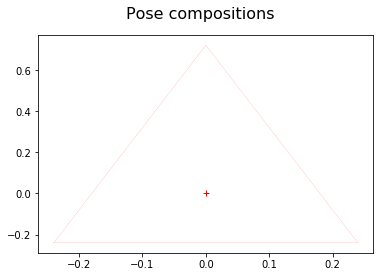

In [21]:
fig = plt.figure()

circle_path('r', fig)